In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots, COLORMAPS
from collections import Counter
from matplotlib.lines import Line2D
from aging.organization.dataframes import load_male_long_df, load_female_long_df, DF_PATHS
from tqdm import tqdm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.tools import pinv_extended  
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from tabulate import tabulate

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from kneed import KneeLocator

In [3]:
def mm_norm_col(column):
    return (column - column.min()) / (column.max() - column.min())

In [4]:
cmm = COLORMAPS.ont_male
cmf = COLORMAPS.ont_female

m_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/beh_age_df/2024-07-30-longtogeny_v2_males_raw_usage_df_beh_age.parquet').groupby(['age','mouse']).mean()
f_df =  pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/beh_age_df/2024-07-30-longtogeny_v2_females_raw_usage_df_beh_age.parquet').groupby(['age','mouse']).mean()
f_df = f_df.query('mouse!="F4_03"')

In [5]:
# avarage per age or session
avg_m_df = m_df.groupby(['age']).mean()
avg_f_df = f_df.groupby(['age']).mean()

## clustering

In [6]:
format_plots()

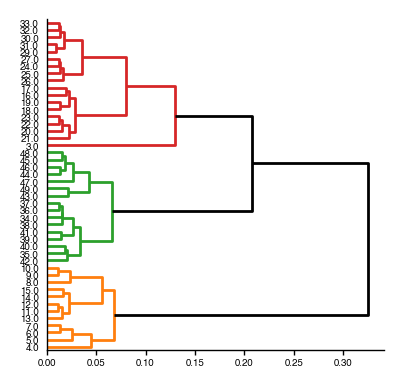

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from kneed import KneeLocator

# Parameters for hierarchical clustering
linkage_method = 'ward'
distance_metric = 'euclidean'
data = avg_m_df.copy()
X = data.values

# Perform hierarchical clustering
Z = linkage(X, method=linkage_method, metric=distance_metric)


# Extract distances at which clusters are merged
distances = Z[:, 2]

# Determine the elbow point in the distances
kneedle = KneeLocator(range(1, len(distances) + 1), distances, S=8.0, curve="convex", direction="increasing")
elbow_point = kneedle.elbow

# Set the color threshold at the elbow point
color_threshold = distances[elbow_point] #objectively finding the elbow point

# Determine a manual threshold
color_threshold = 0.50 * max(Z[:, 2])  # half the maximum distance between clusters

# Set up the plot
fig, ax = plt.subplots(figsize=(2, 2))

# Plot dendrogram with objective color threshold
dendro = dendrogram(Z, labels=data.index.get_level_values('age'), ax=ax, 
                    color_threshold=color_threshold,
                    orientation='right', above_threshold_color='k',
                   )

ax.tick_params(axis='x', labelsize=3.5)
ax.tick_params(axis='y', labelsize=3.5)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
sns.despine()
plt.show()


In [8]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig4"/ '07_31_hir_clustering_male_beh_age.pdf')

In [9]:
## female

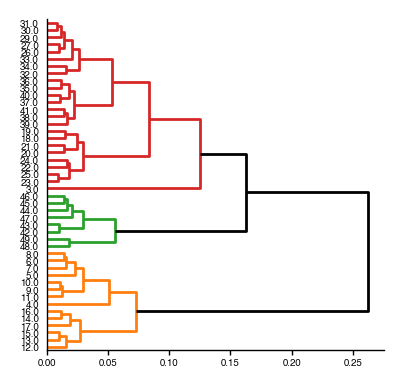

In [10]:
# Parameters for hierarchical clustering
linkage_method = 'ward'
distance_metric = 'euclidean'
data = avg_f_df.copy()
X = data.values

# Perform hierarchical clustering
Z = linkage(X, method=linkage_method, metric=distance_metric)


# Extract distances at which clusters are merged
distances = Z[:, 2]

# Determine the elbow point in the distances
kneedle = KneeLocator(range(1, len(distances) + 1), distances, S=8.0, curve="convex", direction="increasing")
elbow_point = kneedle.elbow

# Set the color threshold at the elbow point
color_threshold = distances[elbow_point] #objectively finding the elbow point

# Determine a manual threshold
color_threshold = 0.5 * max(Z[:, 2])  # half the maximum distance between clusters

# Set up the plot
fig, ax = plt.subplots(figsize=(2, 2))

# Plot dendrogram with objective color threshold
dendro = dendrogram(Z, labels=data.index.get_level_values('age'), ax=ax, 
                    color_threshold=color_threshold,
                    orientation='right', above_threshold_color='k',
                   )

ax.tick_params(axis='x', labelsize=3.5)
ax.tick_params(axis='y', labelsize=3.5)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
sns.despine()
plt.show()

In [11]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig4"/ '07_31_hir_clustering_female_beh_age.pdf')